In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


# ANÁLISIS DE RENDIMIENTO DE CARTERA

In [2]:
import yfinance as yf

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.optimize as sco
from scipy.optimize import minimize

## REVISIÓN DE ACTIVOS FINANCIEROS INDIVIDUALMENTE

### 1. Indice iShares Biotechnology ETF

In [4]:
ticker = "IBB" 

In [5]:
start_date = "2020-01-01"
end_date = "2024-12-13"

In [6]:
ibb_data = yf.download(ticker, start= start_date, end= end_date, interval= "1d")

[*********************100%***********************]  1 of 1 completed


In [7]:
ibb_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,IBB,IBB,IBB,IBB,IBB,IBB
Date,,,,,,
2020-01-02,118.361107,119.889999,121.750000,118.940002,121.300003,2844400
2020-01-03,116.850639,118.360001,119.139999,117.769997,118.199997,5480900
2020-01-06,117.600929,119.120003,119.180000,116.949997,117.690002,2199100
2020-01-07,117.630531,119.150002,119.639999,117.959999,119.160004,1718400
2020-01-08,118.686905,120.220001,120.879997,118.860001,119.070000,3388200
...,...,...,...,...,...,...
2024-12-06,141.300003,141.300003,142.229996,140.240005,140.380005,1627400
2024-12-09,141.740005,141.740005,142.839996,141.350006,141.669998,1255800


### Metricas Basicas de rendimiento

In [8]:
print(ibb_data.head())
print(ibb_data.info())

Price        Adj Close       Close        High         Low        Open  \
Ticker             IBB         IBB         IBB         IBB         IBB   
Date                                                                     
2020-01-02  118.361107  119.889999  121.750000  118.940002  121.300003   
2020-01-03  116.850639  118.360001  119.139999  117.769997  118.199997   
2020-01-06  117.600929  119.120003  119.180000  116.949997  117.690002   
2020-01-07  117.630531  119.150002  119.639999  117.959999  119.160004   
2020-01-08  118.686905  120.220001  120.879997  118.860001  119.070000   

Price        Volume  
Ticker          IBB  
Date                 
2020-01-02  2844400  
2020-01-03  5480900  
2020-01-06  2199100  
2020-01-07  1718400  
2020-01-08  3388200  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1246 entries, 2020-01-02 to 2024-12-12
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Clo

In [9]:
ibb_data.columns #Problema MultiIndex

MultiIndex([('Adj Close', 'IBB'),
            (    'Close', 'IBB'),
            (     'High', 'IBB'),
            (      'Low', 'IBB'),
            (     'Open', 'IBB'),
            (   'Volume', 'IBB')],
           names=['Price', 'Ticker'])

In [10]:
ibb_data.columns = ['_'.join(col) for col in ibb_data.columns] # Se le asigna un _ para concatenar
ibb_data.columns

Index(['Adj Close_IBB', 'Close_IBB', 'High_IBB', 'Low_IBB', 'Open_IBB',
       'Volume_IBB'],
      dtype='object')

In [11]:
ibb_data['Adj Close_IBB']

Date
2020-01-02    118.361107
2020-01-03    116.850639
2020-01-06    117.600929
2020-01-07    117.630531
2020-01-08    118.686905
                 ...    
2024-12-06    141.300003
2024-12-09    141.740005
2024-12-10    140.559998
2024-12-11    140.100006
2024-12-12    137.669998
Name: Adj Close_IBB, Length: 1246, dtype: float64

In [12]:
ibb_data = ibb_data.dropna(subset=['Adj Close_IBB']) #Se eliminan valores vacios
ibb_data['Daily Return'] = ibb_data['Adj Close_IBB'].pct_change()
daily_return_mean = ibb_data['Daily Return'].mean() #Porcentaje de retorno diario
daily_volatility = ibb_data['Daily Return'].std() #Porcentaje de volatilidad diaria

In [13]:
#print(ibb_data.info())

In [14]:
daily_return_mean
daily_volatility

print(f"Retorno promedio diario: {daily_return_mean:.5f}" )
print(f"Volatilidad diaria: {daily_volatility:.5f}" )

Retorno promedio diario: 0.00024
Volatilidad diaria: 0.01553


In [15]:
trading_days = 252  # Número aproximado de días de mercado en un año
annual_return = (1 + daily_return_mean)**trading_days - 1   #Calculo del retorno anual
annual_volatility = daily_volatility * np.sqrt(trading_days) #Calculo de la rentabilidad anual


In [16]:
print(f"Rendimiento promedio diario: {daily_return_mean:.5f}")
print(f"Volatilidad diaria: {daily_volatility:.5f}")
print(f"Rendimiento anual: {annual_return:.2%}")
print(f"Volatilidad anual: {annual_volatility:.2%}")


Rendimiento promedio diario: 0.00024
Volatilidad diaria: 0.01553
Rendimiento anual: 6.29%
Volatilidad anual: 24.66%


### Comportamientos temporales

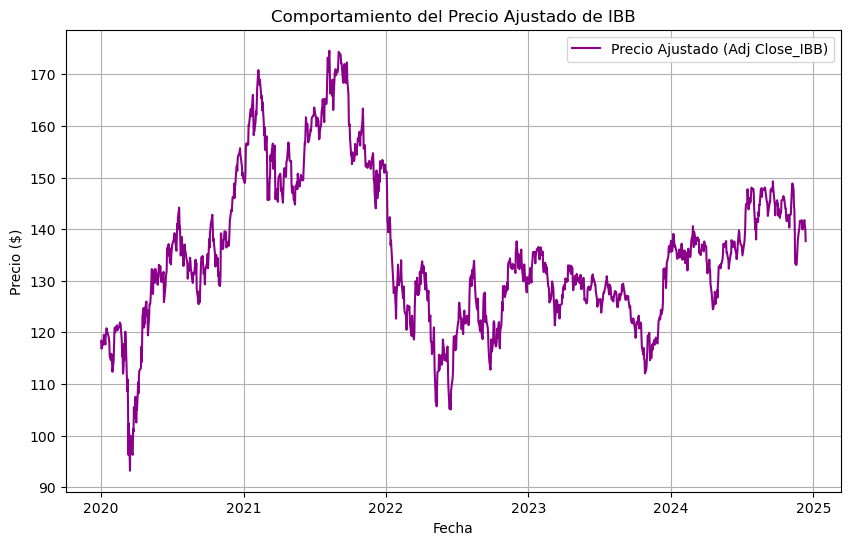

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(ibb_data['Adj Close_IBB'], label='Precio Ajustado (Adj Close_IBB)', color='#8B008B')
plt.title('Comportamiento del Precio Ajustado de IBB')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)


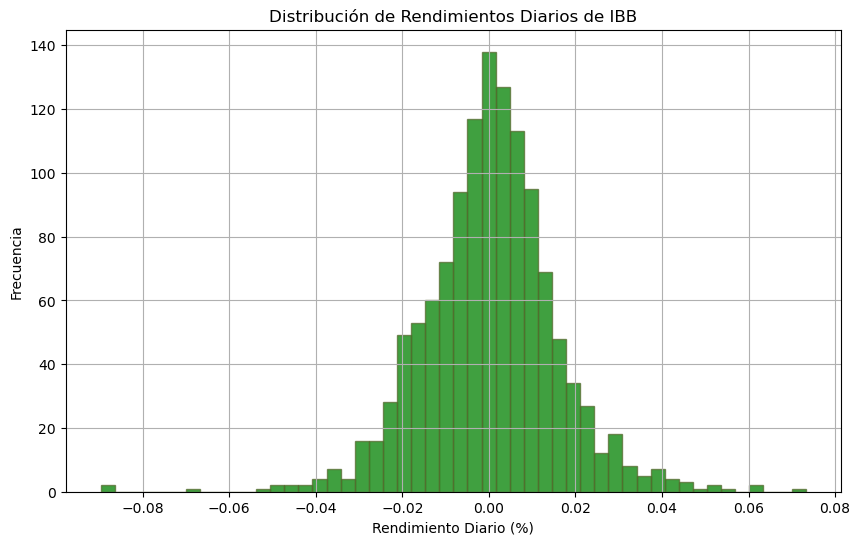

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(ibb_data['Daily Return'], bins=50, alpha=0.75, color='green', edgecolor='#556B2F')
plt.title('Distribución de Rendimientos Diarios de IBB')
plt.xlabel('Rendimiento Diario (%)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### 2. Indice Mason Resources Inc.

In [19]:
ticker = "MGPHF"
start_date = "2020-01-01"
end_date = "2024-12-13"

mgphf_data = yf.download(ticker, start= start_date, end= end_date, interval= "1d")

[*********************100%***********************]  1 of 1 completed


### Métricas Básicas de rendimiento

In [20]:
print(mgphf_data.head())
print(mgphf_data.info())



Price      Adj Close   Close    High     Low    Open  Volume
Ticker         MGPHF   MGPHF   MGPHF   MGPHF   MGPHF   MGPHF
Date                                                        
2020-01-02    0.1598  0.1598  0.1600  0.1500  0.1500  103800
2020-01-03    0.1610  0.1610  0.1670  0.1600  0.1600   86400
2020-01-06    0.1669  0.1669  0.1690  0.1610  0.1690   34400
2020-01-07    0.1760  0.1760  0.2585  0.1634  0.1700  880000
2020-01-08    0.1978  0.1978  0.2150  0.1810  0.1874  121200
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1246 entries, 2020-01-02 to 2024-12-12
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, MGPHF)  1246 non-null   float64
 1   (Close, MGPHF)      1246 non-null   float64
 2   (High, MGPHF)       1246 non-null   float64
 3   (Low, MGPHF)        1246 non-null   float64
 4   (Open, MGPHF)       1246 non-null   float64
 5   (Volume, MGPHF)     1246 non-null   int6

In [21]:
mgphf_data.columns #Hay problema de MultiIndex


MultiIndex([('Adj Close', 'MGPHF'),
            (    'Close', 'MGPHF'),
            (     'High', 'MGPHF'),
            (      'Low', 'MGPHF'),
            (     'Open', 'MGPHF'),
            (   'Volume', 'MGPHF')],
           names=['Price', 'Ticker'])

In [22]:
mgphf_data.columns = ['_'.join(col) for col in mgphf_data.columns] #Se le asigna un _ para concatenar
mgphf_data.columns 

Index(['Adj Close_MGPHF', 'Close_MGPHF', 'High_MGPHF', 'Low_MGPHF',
       'Open_MGPHF', 'Volume_MGPHF'],
      dtype='object')

In [23]:
mgphf_data['Adj Close_MGPHF']

Date
2020-01-02    0.1598
2020-01-03    0.1610
2020-01-06    0.1669
2020-01-07    0.1760
2020-01-08    0.1978
               ...  
2024-12-06    0.0344
2024-12-09    0.0328
2024-12-10    0.0333
2024-12-11    0.0333
2024-12-12    0.0400
Name: Adj Close_MGPHF, Length: 1246, dtype: float64

In [24]:
mgphf_data = mgphf_data.dropna(subset=['Adj Close_MGPHF'])
mgphf_data['Daily Return'] = mgphf_data['Adj Close_MGPHF'].pct_change()
daily_return_mean_mgphf = mgphf_data['Daily Return'].mean()
daily_volatility_mgphf = mgphf_data['Daily Return'].std()


In [25]:
daily_return_mean_mgphf
daily_volatility_mgphf

print(f"Retorno promedio diario: {daily_return_mean_mgphf:.5f}" )
print(f"Volatilidad diaria: {daily_volatility_mgphf:.5f}" )

Retorno promedio diario: 0.00090
Volatilidad diaria: 0.06423


In [26]:
trading_days = 252  # Número aproximado de días de mercado en un año
annual_return_mgphf = (1 + daily_return_mean_mgphf)**trading_days - 1  
annual_volatility_mgphf = daily_volatility_mgphf * np.sqrt(trading_days)  


print(f"Rendimiento promedio diario: {daily_return_mean_mgphf:.5f}")
print(f"Volatilidad diaria: {daily_volatility_mgphf:.5f}")
print(f"Rendimiento anual: {annual_return_mgphf:.2%}")
print(f"Volatilidad anual: {annual_volatility_mgphf:.2%}")



Rendimiento promedio diario: 0.00090
Volatilidad diaria: 0.06423
Rendimiento anual: 25.36%
Volatilidad anual: 101.96%


### Comportamientos temporales

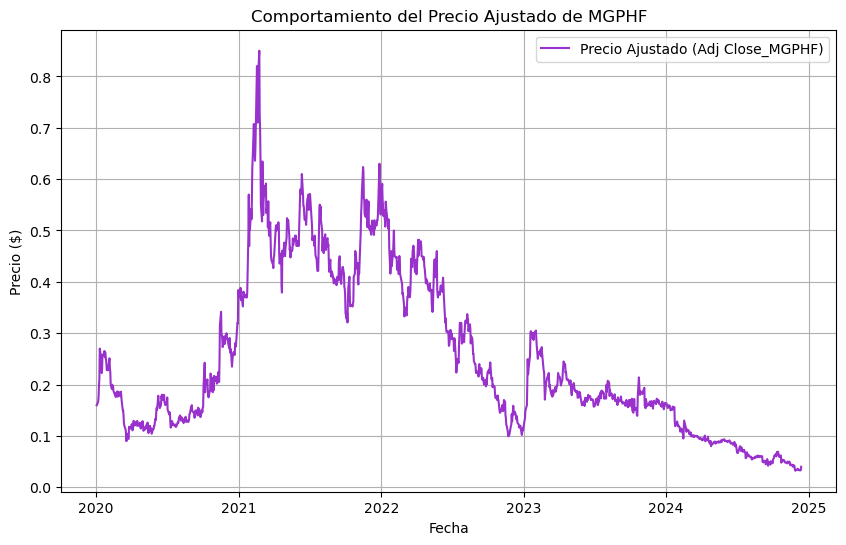

In [27]:
plt.figure(figsize=(10, 6))
plt.plot(mgphf_data['Adj Close_MGPHF'], label='Precio Ajustado (Adj Close_MGPHF)', color='#9932CC')
plt.title('Comportamiento del Precio Ajustado de MGPHF')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)



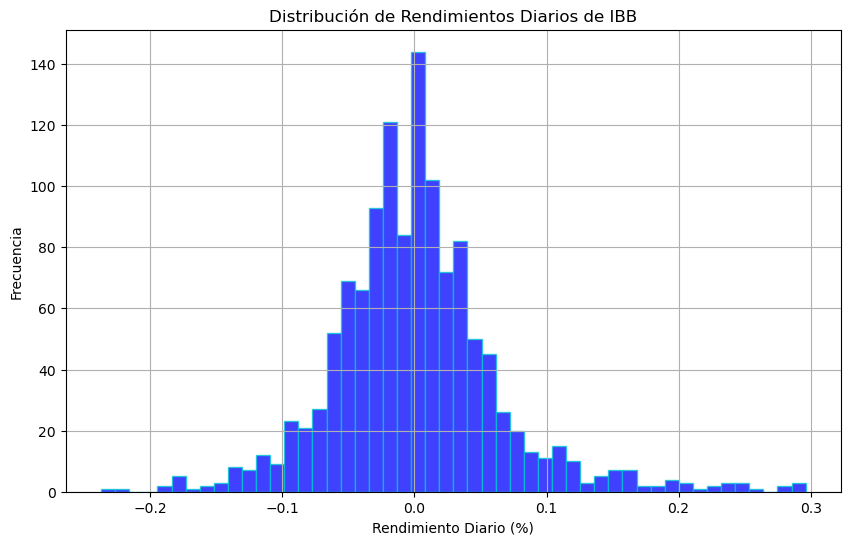

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(mgphf_data['Daily Return'], bins=50, alpha=0.75, color='blue', edgecolor='#00CED1')
plt.title('Distribución de Rendimientos Diarios de IBB')
plt.xlabel('Rendimiento Diario (%)')
plt.ylabel('Frecuencia')
plt.grid(True)

### 3. VanEck Semiconductor UCITS ETF

In [29]:

ticker = "SMHV.SW"
start_date = "2020-01-01"
end_date = "2024-12-13"

smhv_sw_data = yf.download(ticker, start= start_date, end= end_date, interval= "1d")


[*********************100%***********************]  1 of 1 completed


In [30]:
print(smhv_sw_data.head())
print(smhv_sw_data.info())



Price       Adj Close      Close       High        Low       Open  Volume
Ticker        SMHV.SW    SMHV.SW    SMHV.SW    SMHV.SW    SMHV.SW SMHV.SW
Date                                                                     
2020-12-15  18.101999  18.101999  18.101999  18.101999  18.101999       0
2020-12-16  18.162001  18.162001  18.162001  18.162001  18.162001       0
2020-12-17  18.180000  18.180000  18.180000  18.180000  18.180000       0
2020-12-18  18.180000  18.180000  18.180000  18.180000  18.180000       0
2020-12-21  17.903999  17.903999  17.903999  17.903999  17.903999       0
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1010 entries, 2020-12-15 to 2024-12-12
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Adj Close, SMHV.SW)  1010 non-null   float64
 1   (Close, SMHV.SW)      1010 non-null   float64
 2   (High, SMHV.SW)       1010 non-null   float64
 3   (Low, SMHV.SW)        10

In [31]:
smhv_sw_data.columns


MultiIndex([('Adj Close', 'SMHV.SW'),
            (    'Close', 'SMHV.SW'),
            (     'High', 'SMHV.SW'),
            (      'Low', 'SMHV.SW'),
            (     'Open', 'SMHV.SW'),
            (   'Volume', 'SMHV.SW')],
           names=['Price', 'Ticker'])

In [32]:
smhv_sw_data.columns = ['_'.join(col) for col in smhv_sw_data ]#Se le asigna un _ para concatenar

smhv_sw_data.columns


Index(['Adj Close_SMHV.SW', 'Close_SMHV.SW', 'High_SMHV.SW', 'Low_SMHV.SW',
       'Open_SMHV.SW', 'Volume_SMHV.SW'],
      dtype='object')

In [33]:
smhv_sw_data['Adj Close_SMHV.SW']

Date
2020-12-15    18.101999
2020-12-16    18.162001
2020-12-17    18.180000
2020-12-18    18.180000
2020-12-21    17.903999
                ...    
2024-12-06    36.450001
2024-12-09    36.619999
2024-12-10    35.799999
2024-12-11    36.279999
2024-12-12    36.410000
Name: Adj Close_SMHV.SW, Length: 1010, dtype: float64

In [34]:
smhv_sw_data = smhv_sw_data.dropna(subset=['Adj Close_SMHV.SW'])
smhv_sw_data['Daily Return'] = smhv_sw_data['Adj Close_SMHV.SW'].pct_change()
daily_return_mean_smhv_sw = smhv_sw_data['Daily Return'].mean()
daily_volatility_smhv_sw = smhv_sw_data['Daily Return'].std()

In [35]:
daily_return_mean_smhv_sw
daily_volatility_smhv_sw

print(f"Retorno promedio diario: {daily_return_mean_smhv_sw:.5f}" )
print(f"Volatilidad diaria: {daily_volatility_smhv_sw:.5f}" )

Retorno promedio diario: 0.00090
Volatilidad diaria: 0.02032


In [36]:
trading_days = 252  # Número aproximado de días de mercado en un año
annual_return_smhv_sw = (1 + daily_return_mean_smhv_sw)**trading_days - 1  
annual_volatility_smhv_sw = daily_volatility_smhv_sw * np.sqrt(trading_days)  

print(f"Rendimiento promedio diario: {daily_return_mean_smhv_sw:.5f}")
print(f"Volatilidad diaria: {daily_volatility_smhv_sw:.5f}")
print(f"Rendimiento anual: {annual_return_smhv_sw:.2%}")
print(f"Volatilidad anual: {annual_volatility_smhv_sw:.2%}")


Rendimiento promedio diario: 0.00090
Volatilidad diaria: 0.02032
Rendimiento anual: 25.42%
Volatilidad anual: 32.25%


### Comportamientos temporales

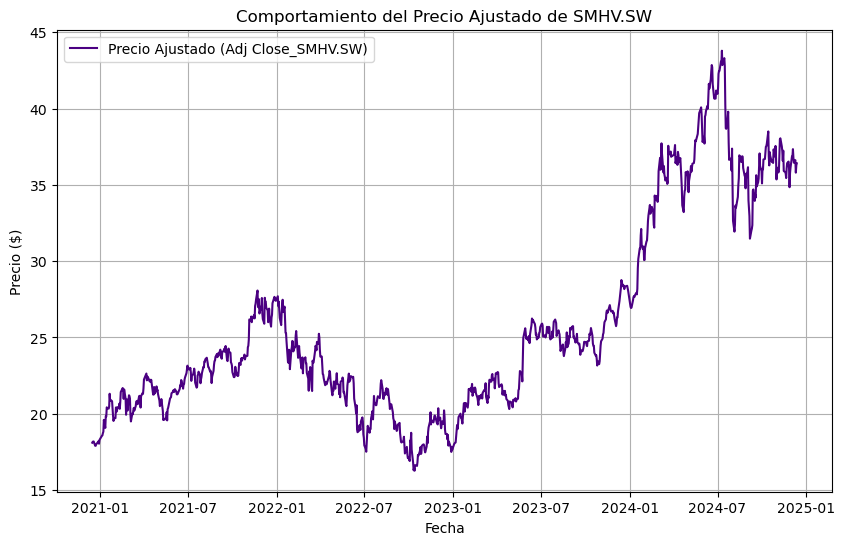

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(smhv_sw_data['Adj Close_SMHV.SW'], label='Precio Ajustado (Adj Close_SMHV.SW)', color='#4B0082')
plt.title('Comportamiento del Precio Ajustado de SMHV.SW')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)
plt.show()

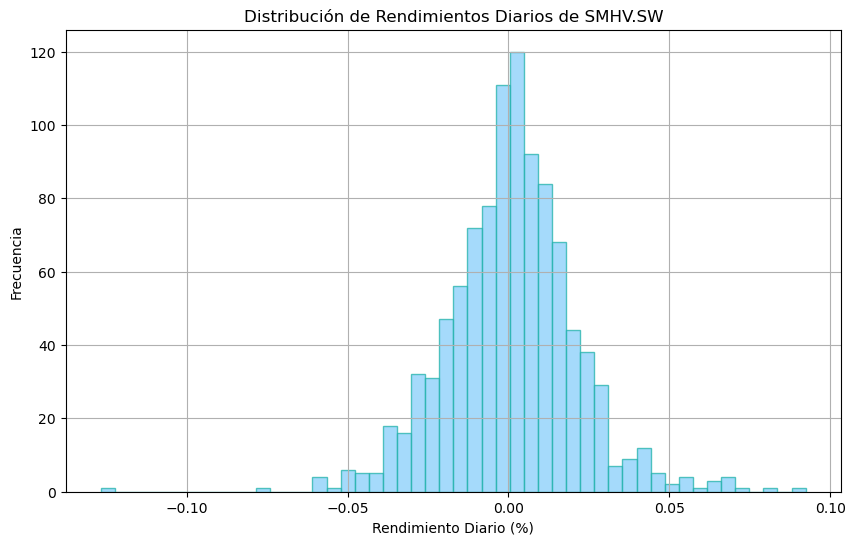

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(smhv_sw_data['Daily Return'], bins=50, alpha=0.75, color='#87CEFA', edgecolor='#20B2AA')
plt.title('Distribución de Rendimientos Diarios de SMHV.SW')
plt.xlabel('Rendimiento Diario (%)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### 4. iShares Lithium Miners and Producers


In [39]:
ticker = "LITM.AS"
start_date = "2020-01-01"
end_date = "2024-12-13"

litmas_data = yf.download(ticker, start= start_date, end= end_date, interval= "1d")

[*********************100%***********************]  1 of 1 completed


In [40]:
print(mgphf_data.head())
print(mgphf_data.info())

            Adj Close_MGPHF  Close_MGPHF  High_MGPHF  Low_MGPHF  Open_MGPHF  \
Date                                                                          
2020-01-02           0.1598       0.1598      0.1600     0.1500      0.1500   
2020-01-03           0.1610       0.1610      0.1670     0.1600      0.1600   
2020-01-06           0.1669       0.1669      0.1690     0.1610      0.1690   
2020-01-07           0.1760       0.1760      0.2585     0.1634      0.1700   
2020-01-08           0.1978       0.1978      0.2150     0.1810      0.1874   

            Volume_MGPHF  Daily Return  
Date                                    
2020-01-02        103800           NaN  
2020-01-03         86400      0.007509  
2020-01-06         34400      0.036646  
2020-01-07        880000      0.054524  
2020-01-08        121200      0.123864  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1246 entries, 2020-01-02 to 2024-12-12
Data columns (total 7 columns):
 #   Column           Non-Null Coun

In [41]:
litmas_data.columns

MultiIndex([('Adj Close', 'LITM.AS'),
            (    'Close', 'LITM.AS'),
            (     'High', 'LITM.AS'),
            (      'Low', 'LITM.AS'),
            (     'Open', 'LITM.AS'),
            (   'Volume', 'LITM.AS')],
           names=['Price', 'Ticker'])

In [42]:
litmas_data.columns = ['_'.join(col) for col in litmas_data ]

litmas_data.columns

Index(['Adj Close_LITM.AS', 'Close_LITM.AS', 'High_LITM.AS', 'Low_LITM.AS',
       'Open_LITM.AS', 'Volume_LITM.AS'],
      dtype='object')

In [43]:
litmas_data['Adj Close_LITM.AS']

Date
2023-11-02    4.8855
2023-11-03    5.1578
2023-11-06    5.2757
2023-11-07    5.1342
2023-11-08    5.1082
               ...  
2024-12-06    4.6092
2024-12-09    4.7028
2024-12-10    4.6196
2024-12-11    4.6086
2024-12-12    4.6503
Name: Adj Close_LITM.AS, Length: 285, dtype: float64

In [44]:
litmas_data = litmas_data.dropna(subset=['Adj Close_LITM.AS'])
litmas_data['Daily Return'] = litmas_data['Adj Close_LITM.AS'].pct_change()
daily_return_mean_litmas = litmas_data['Daily Return'].mean()
daily_volatility_litmas = litmas_data['Daily Return'].std()

In [45]:
daily_return_mean_litmas
daily_volatility_litmas

print(f"Retorno promedio diario: {daily_return_mean_litmas:.5f}" )
print(f"Volatilidad diaria: {daily_volatility_litmas:.5f}" )

Retorno promedio diario: -0.00004
Volatilidad diaria: 0.01628


In [46]:
trading_days = 252  # Número aproximado de días de mercado en un año
annual_return_litmas = (1 + daily_return_mean_litmas)**trading_days - 1  
annual_volatility_litmas = daily_volatility_litmas * np.sqrt(trading_days)  


print(f"Rendimiento promedio diario: {daily_return_mean_litmas:.5f}")
print(f"Volatilidad diaria: {daily_volatility_litmas:.5f}")
print(f"Rendimiento anual: {annual_return_litmas:.2%}")
print(f"Volatilidad anual: {annual_volatility_litmas:.2%}")



Rendimiento promedio diario: -0.00004
Volatilidad diaria: 0.01628
Rendimiento anual: -1.05%
Volatilidad anual: 25.85%


### Comportamientos temporales

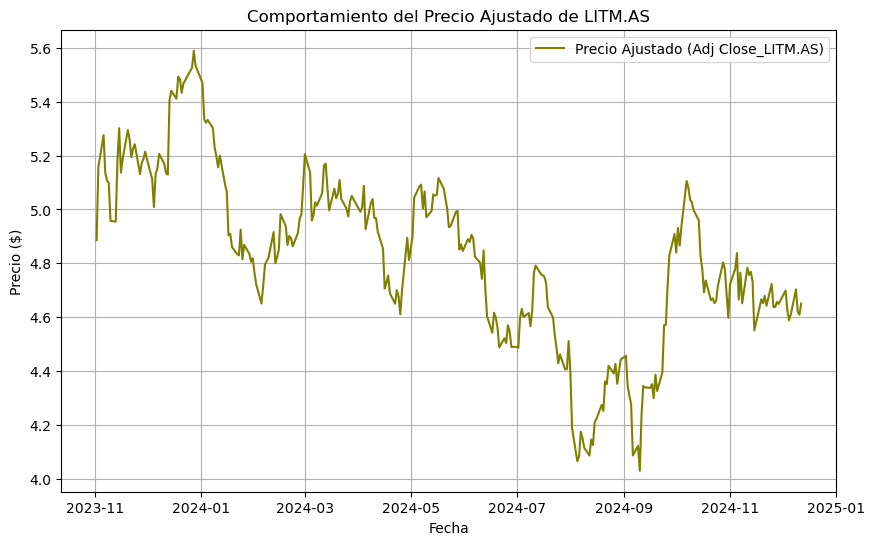

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(litmas_data['Adj Close_LITM.AS'], label='Precio Ajustado (Adj Close_LITM.AS)', color='#808000')
plt.title('Comportamiento del Precio Ajustado de LITM.AS')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)


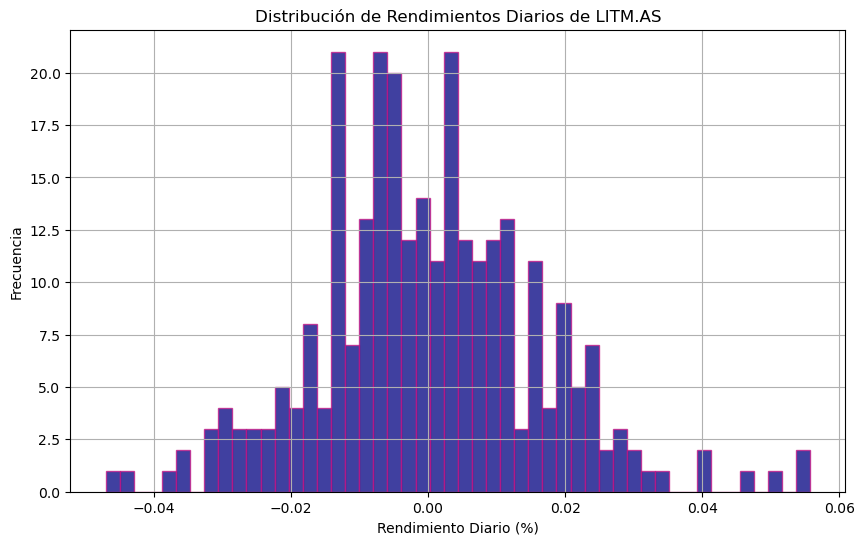

In [48]:
plt.figure(figsize=(10, 6))
plt.hist(litmas_data['Daily Return'], bins=50, alpha=0.75, color='#000080', edgecolor='#C71585')
plt.title('Distribución de Rendimientos Diarios de LITM.AS')
plt.xlabel('Rendimiento Diario (%)')
plt.ylabel('Frecuencia')
plt.grid(True)

### 5. iShares MSCI Emerging Markets ETF 

In [49]:

ticker = "EEM"
start_date = "2020-01-01"
end_date = "2024-12-13"


eem_data = yf.download(ticker, start= start_date, end= end_date, interval= "1d")

[*********************100%***********************]  1 of 1 completed


In [50]:
print(eem_data.head())
print(eem_data.info())


Price       Adj Close      Close       High        Low       Open    Volume
Ticker            EEM        EEM        EEM        EEM        EEM       EEM
Date                                                                       
2020-01-02  41.747726  45.779999  45.779999  45.349998  45.360001  78570100
2020-01-03  40.972595  44.930000  45.259998  44.910000  45.029999  78998200
2020-01-06  40.872284  44.820000  44.869999  44.590000  44.599998  40085300
2020-01-07  40.844925  44.790001  44.900002  44.689999  44.790001  65705300
2020-01-08  41.082024  45.049999  45.299999  44.689999  44.730000  86913300
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1246 entries, 2020-01-02 to 2024-12-12
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (Adj Close, EEM)  1246 non-null   float64
 1   (Close, EEM)      1246 non-null   float64
 2   (High, EEM)       1246 non-null   float64
 3   (Low, EEM)        1246 non-n

In [51]:
eem_data.columns #Problema Multiindex

MultiIndex([('Adj Close', 'EEM'),
            (    'Close', 'EEM'),
            (     'High', 'EEM'),
            (      'Low', 'EEM'),
            (     'Open', 'EEM'),
            (   'Volume', 'EEM')],
           names=['Price', 'Ticker'])

In [52]:
eem_data.columns = ['_'.join(col) for col in eem_data] #Concatenar '_'

eem_data.columns

Index(['Adj Close_EEM', 'Close_EEM', 'High_EEM', 'Low_EEM', 'Open_EEM',
       'Volume_EEM'],
      dtype='object')

In [53]:
eem_data['Adj Close_EEM']

Date
2020-01-02    41.747726
2020-01-03    40.972595
2020-01-06    40.872284
2020-01-07    40.844925
2020-01-08    41.082024
                ...    
2024-12-06    43.849998
2024-12-09    44.750000
2024-12-10    44.029999
2024-12-11    44.209999
2024-12-12    43.990002
Name: Adj Close_EEM, Length: 1246, dtype: float64

In [54]:
eem_data = eem_data.dropna(subset=['Adj Close_EEM'])
eem_data['Daily Return'] = eem_data['Adj Close_EEM'].pct_change()
daily_return_mean_eem = eem_data['Daily Return'].mean()
daily_volatility_eem = eem_data['Daily Return'].std()


In [55]:
daily_return_mean_eem
daily_volatility_eem

print(f"Retorno promedio diario: {daily_return_mean_eem:.5f}" )
print(f"Volatilidad diaria: {daily_volatility_eem:.5f}" )

Retorno promedio diario: 0.00014
Volatilidad diaria: 0.01416


In [56]:
trading_days = 252  # Número aproximado de días de mercado en un año
annual_return_eem = (1 + daily_return_mean_eem)**trading_days - 1  
annual_volatility_eem = daily_volatility_eem * np.sqrt(trading_days)  

print(f"Rendimiento promedio diario: {daily_return_mean_eem:.5f}")
print(f"Volatilidad diaria: {daily_volatility_eem:.5f}")
print(f"Rendimiento anual: {annual_return_eem:.2%}")
print(f"Volatilidad anual: {annual_volatility_eem:.2%}")

Rendimiento promedio diario: 0.00014
Volatilidad diaria: 0.01416
Rendimiento anual: 3.67%
Volatilidad anual: 22.48%


### Comportamientos temporales

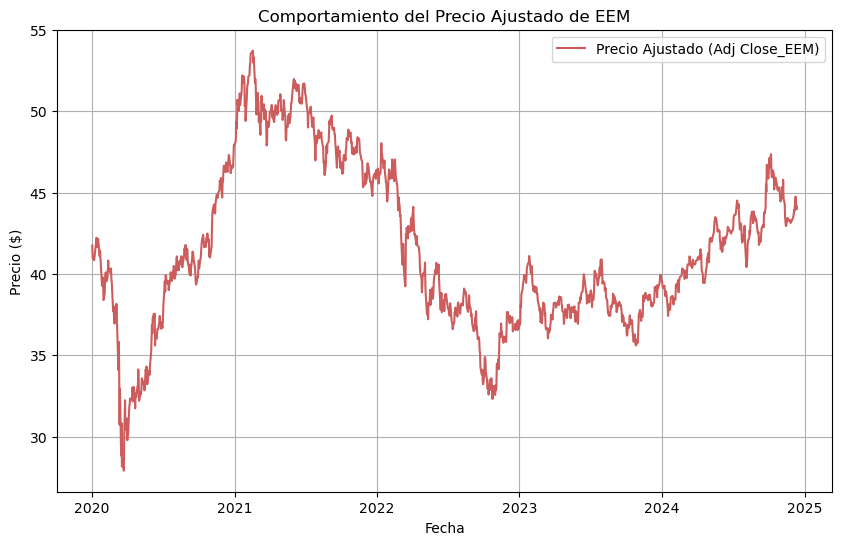

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(eem_data['Adj Close_EEM'], label='Precio Ajustado (Adj Close_EEM)', color='#CD5C5C')
plt.title('Comportamiento del Precio Ajustado de EEM')
plt.xlabel('Fecha')
plt.ylabel('Precio ($)')
plt.legend()
plt.grid(True)
plt.show()

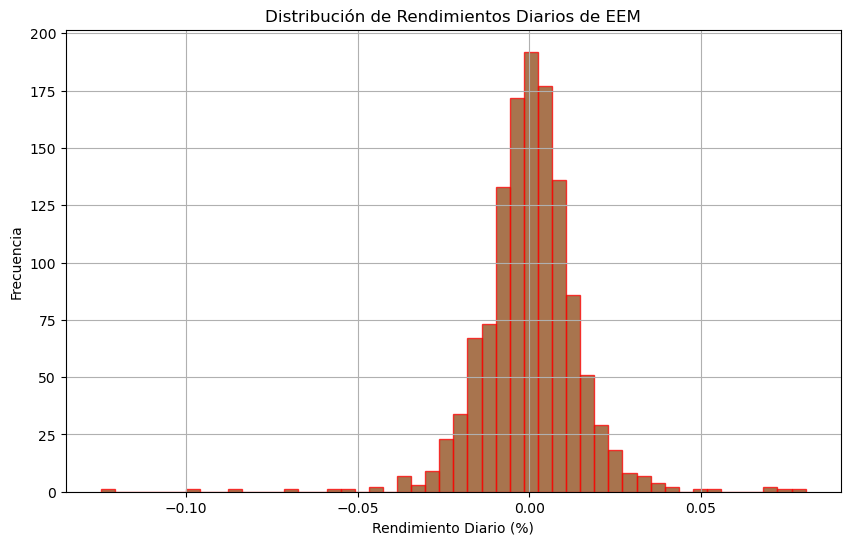

In [58]:
plt.figure(figsize=(10, 6))
plt.hist(eem_data['Daily Return'], bins=50, alpha=0.75, color='#8B4513', edgecolor='#FF0000')
plt.title('Distribución de Rendimientos Diarios de EEM')
plt.xlabel('Rendimiento Diario (%)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## RENDIMIENTO PONDERADO DE CARTERA

In [59]:
activos = {               # Diccionario de datos de cada activo
    "IBB": "IBB",
    "Mason Resources": "MNR",
    "SMH": "SMH",
    "LIT": "LIT",
    "EEM": "EEM"
}


In [60]:
datos_historicos = {} #Variable para guardar los datos finales del precio de los activos


In [61]:
for nombre, ticker in activos.items():
    datos_historicos[nombre] = yf.download(ticker, start="2020-01-01", end="2024-12-13", interval="1d")["Adj Close"]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [62]:
df_precios = pd.concat(datos_historicos.values(), axis=1) #Ordenar por columnas
df_precios.columns = datos_historicos.keys() #Llamar a los identificaccdores del diccioanrio
df_precios

,IBB,Mason Resources,SMH,LIT,EEM
Date,,,,,
2020-01-02,118.361107,NaN,70.230339,26.739830,41.747726
2020-01-03,116.850639,NaN,69.079910,26.373001,40.972595
2020-01-06,117.600929,NaN,68.342064,26.488844,40.872284
2020-01-07,117.630531,NaN,69.482803,26.846020,40.844925
2020-01-08,118.686905,NaN,69.599304,26.286125,41.082024
...,...,...,...,...,...
2024-12-06,141.300003,14.56,248.610001,44.180000,43.849998
2024-12-09,141.740005,14.73,246.070007,45.840000,44.750000
2024-12-10,140.559998,14.67,239.880005,44.040001,44.029999


In [63]:
rendimientos_diarios = df_precios.pct_change().dropna() 
volatilidad_diaria = rendimientos_diarios.std()
volatilidad_anual = volatilidad_diaria * np.sqrt(252)


In [64]:
volatilidad_anual

IBB                0.180405
Mason Resources    0.276928
SMH                0.334248
LIT                0.324615
EEM                0.154680
dtype: float64

### Matriz de correlación de la cartera

In [65]:
matriz_correlacion = df_precios.pct_change().corr()

matriz_correlacion

,IBB,Mason Resources,SMH,LIT,EEM
IBB,1.000000,0.115981,0.626503,0.536841,0.609303
Mason Resources,0.115981,1.000000,0.164592,0.129800,0.175523
SMH,0.626503,0.164592,1.000000,0.614504,0.717197
LIT,0.536841,0.129800,0.614504,1.000000,0.743923
EEM,0.609303,0.175523,0.717197,0.743923,1.000000


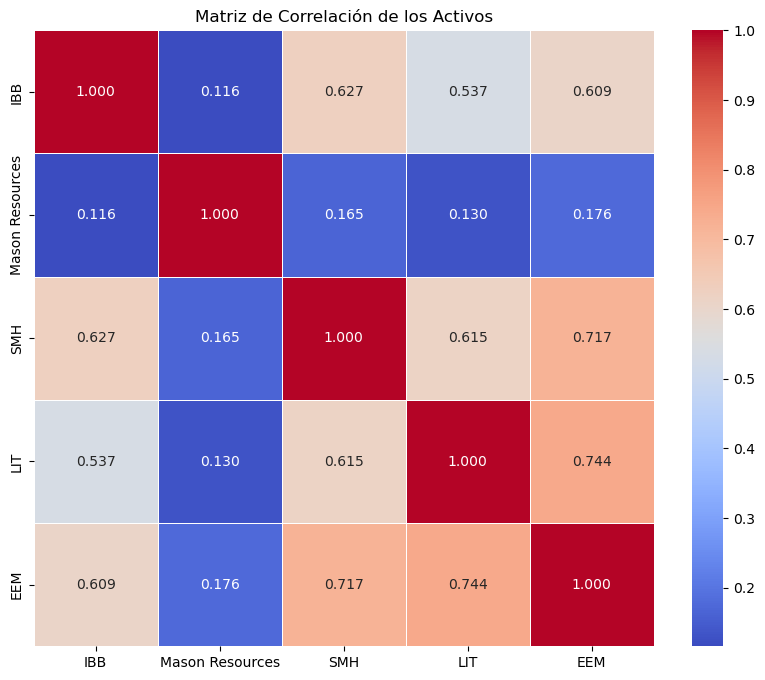

In [66]:
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title("Matriz de Correlación de los Activos")
plt.show()

### Optimización de la cartera usando la Frontera Eficiente

In [67]:
rendimientos_esperados = df_precios.pct_change().mean() #Promedio de los rendimientos diarios 
covarianza = df_precios.pct_change().cov() #Calulo de la covarianza


In [68]:
def riesgo_cartera(pesos, covarianza):
    return np.sqrt(np.dot(pesos.T, np.dot(covarianza, pesos)))

In [69]:
def restriccion_pesos(pesos):
    return np.sum(pesos) - 1

In [70]:
pesos_iniciales = np.ones(len(df_precios.columns)) / len(df_precios.columns)

In [71]:
restricciones = ({'type': 'eq', 'fun': restriccion_pesos})


In [72]:
resultado = sco.minimize(riesgo_cartera, pesos_iniciales, args=(covarianza), method='SLSQP', bounds=[(0, 1)]*len(df_precios.columns), constraints=restricciones)

In [73]:
pesos_optimos = resultado.x
print(f"Pesos optimizados: {pesos_optimos}")


Pesos optimizados: [0.3141853  0.34694684 0.         0.         0.33886786]


In [74]:
rendimiento_cartera = np.sum(rendimientos_esperados * pesos_optimos)
print(f"Rendimiento esperado de la cartera: {rendimiento_cartera}")

Rendimiento esperado de la cartera: 0.00015991228746217568


In [75]:
riesgo_cartera_final = riesgo_cartera(pesos_optimos, covarianza)
print(f"Riesgo de la cartera (volatilidad): {riesgo_cartera_final}")


Riesgo de la cartera (volatilidad): 0.011136927893560711


### Rentabilidad Anual

In [76]:
dias_trading = 252

rendimiento_anual = (1 + rendimiento_cartera) ** dias_trading - 1
print(f"Rentabilidad anual: {rendimiento_anual:.4f}")


Rentabilidad anual: 0.0411


### Cálculo del CAGR

In [77]:
valor_inicial = df_precios.iloc[0].sum()  # Valor total al inicio
valor_final = df_precios.iloc[-1].sum()   # Valor total al final
num_anos = (df_precios.index[-1] - df_precios.index[0]).days / 365
cagr = (valor_final / valor_inicial) ** (1 / num_anos) - 1

print(f"CAGR de la cartera: {cagr:.4f}")

CAGR de la cartera: 0.1367


### Matriz de correlación

In [78]:
matriz_correlacion = df_precios.corr()

print("Matriz de correlación entre activos:")
print(matriz_correlacion)


Matriz de correlación entre activos:
                      IBB  Mason Resources       SMH       LIT       EEM
IBB              1.000000         0.248896  0.243096  0.373790  0.834320
Mason Resources  0.248896         1.000000  0.597928 -0.516061  0.377457
SMH              0.243096         0.597928  1.000000 -0.046167  0.239899
LIT              0.373790        -0.516061 -0.046167  1.000000  0.414561
EEM              0.834320         0.377457  0.239899  0.414561  1.000000


In [79]:
rendimientos_activos = np.log(df_precios / df_precios.shift(1))
rendimientos_activos = rendimientos_activos.dropna()

In [80]:
matriz_covarianza = rendimientos_activos.cov()

In [81]:
num_simulaciones = 10000
rendimientos_simulados = []
riesgos_simulados = []

In [82]:
for _ in range(num_simulaciones):
    # Generar pesos aleatorios
    pesos = np.random.random(len(df_precios.columns))
    pesos /= np.sum(pesos)  # Normalizar para que la suma sea 1

    # Calcular el rendimiento esperado y la volatilidad de la cartera
    rendimiento_simulado = np.sum(pesos * rendimientos_esperados)
    riesgo_simulado = np.sqrt(np.dot(pesos.T, np.dot(matriz_covarianza, pesos)))

    # Guardar los resultados
    rendimientos_simulados.append(rendimiento_simulado)
    riesgos_simulados.append(riesgo_simulado)

# Convertir los resultados en arrays
rendimientos_simulados = np.array(rendimientos_simulados)
riesgos_simulados = np.array(riesgos_simulados)


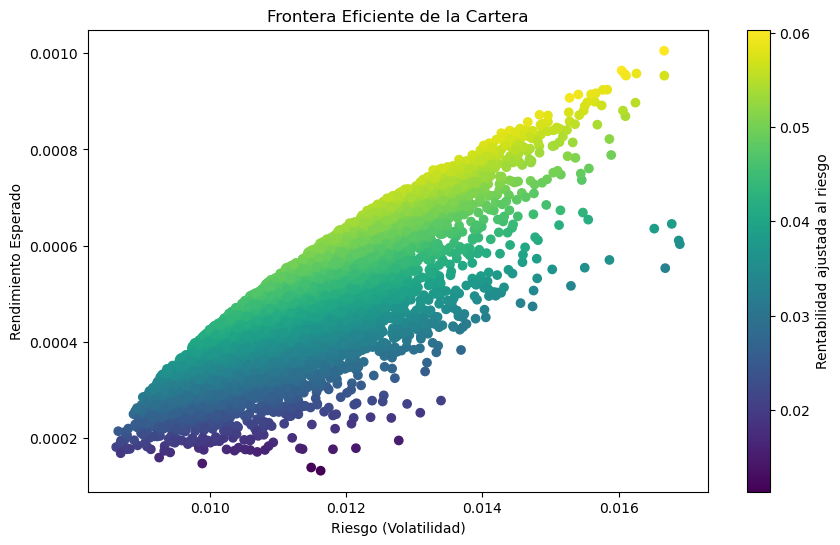

In [83]:
# Graficar la frontera eficiente
plt.figure(figsize=(10, 6))
plt.scatter(riesgos_simulados, rendimientos_simulados, c=rendimientos_simulados / riesgos_simulados, cmap='viridis', marker='o')
plt.title('Frontera Eficiente de la Cartera')
plt.xlabel('Riesgo (Volatilidad)')
plt.ylabel('Rendimiento Esperado')
plt.colorbar(label='Rentabilidad ajustada al riesgo')
plt.show()


### Simulación de pesos para una volatilidad del riesgo al 0.016 

In [84]:
nivel_deseado = 0.016  # Riesgo (volatilidad) deseado

In [85]:
# Función objetivo: Minimizar la diferencia entre el riesgo de la cartera y el nivel deseado
def objetivo_riesgo(pesos, matriz_covarianza, nivel_deseado):
    riesgo = np.sqrt(np.dot(pesos.T, np.dot(matriz_covarianza, pesos)))
    return abs(riesgo - nivel_deseado)

# Restricción: Los pesos deben sumar 1
restriccion_suma = {'type': 'eq', 'fun': lambda pesos: np.sum(pesos) - 1}

# Restricción: No permitir pesos negativos (no posiciones cortas)
bounds = [(0, 1) for _ in range(len(rendimientos_esperados))]

# Pesos iniciales (distribución uniforme)
pesos_iniciales = np.ones(len(rendimientos_esperados)) / len(rendimientos_esperados)

# Optimización
resultado = minimize (
    objetivo_riesgo,
    pesos_iniciales,
    args=(matriz_covarianza, nivel_deseado),
    method='SLSQP',
    bounds=bounds,
    constraints=[restriccion_suma])



In [86]:

# Pesos optimizados
pesos_optimizados = resultado.x
print("Pesos optimizados:", pesos_optimizados)

# Calcular el rendimiento y riesgo de la cartera para verificar
riesgo_final = np.sqrt(np.dot(pesos_optimizados.T, np.dot(matriz_covarianza, pesos_optimizados)))
rendimiento_final = np.sum(pesos_optimizados * rendimientos_esperados)
print(f"Riesgo de la cartera: {riesgo_final}")
print(f"Rendimiento de la cartera: {rendimiento_final}")


Pesos optimizados: [3.18596155e-04 5.43995097e-02 4.73108931e-01 4.45063568e-01
 2.71093957e-02]
Riesgo de la cartera: 0.016000002223520816
Rendimiento de la cartera: 0.0009051019320566726


### Rentabilidad Anual


In [87]:
dias_trading = 252

# Rentabilidad anual
rendimiento_anual = (1 + rendimiento_final) ** dias_trading - 1
print(f"Rentabilidad anual: {rendimiento_anual:.4f}")


Rentabilidad anual: 0.2561


### Frontera eficiente - Comparación gráfica

In [88]:
riesgos_simulados = riesgos_simulados  # Volatilidades simuladas
rendimientos_simulados = rendimientos_simulados  # Rendimientos simulados

# Datos de la cartera anterior (punto base)
riesgo_anterior = 0.011183516612297145  # Riesgo (volatilidad)
rendimiento_anterior = 0.0001881380828084073  # Rendimiento esperado

# Datos de la cartera optimizada (con un riesgo de 0.016)
riesgo_optimizado = 0.01599999244691525  # Riesgo (volatilidad optimizada)
rendimiento_optimizado = 0.0009133576640537821  # Rendimiento esperado optimizado

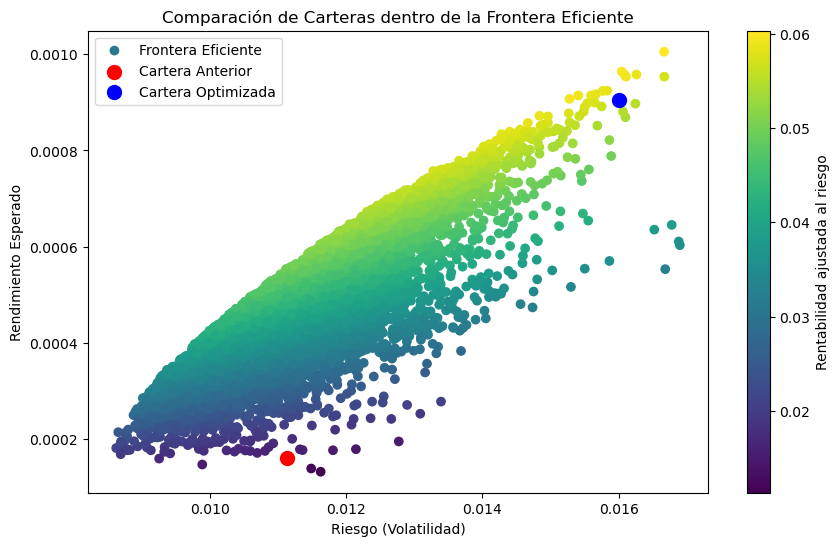

In [89]:
# Generar el gráfico
plt.figure(figsize=(10, 6))
plt.scatter(
    riesgos_simulados,
    rendimientos_simulados,
    c=rendimientos_simulados / riesgos_simulados,
    cmap="viridis",
    label="Frontera Eficiente"
)
plt.colorbar(label="Rentabilidad ajustada al riesgo")
plt.scatter(riesgo_cartera_final, rendimiento_cartera, color="red", label="Cartera Anterior", s=100)
plt.scatter(riesgo_final, rendimiento_final, color="blue", label="Cartera Optimizada", s=100)
plt.title("Comparación de Carteras dentro de la Frontera Eficiente")
plt.xlabel("Riesgo (Volatilidad)")
plt.ylabel("Rendimiento Esperado")
plt.legend()
plt.show()

